In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodide_http
pyodide_http.patch_all()

# Load in the data.
df = pd.read_csv('https://raw.githubusercontent.com/Kil0-ui/diabetes-predictor-notebook/main/content/diabetes.csv');
# Clean the data. BMI has 0s in some rows, so we remove them
df = df.loc[~((df['BMI'] == 0))]
df = df.loc[~((df['Glucose'] == 0))]

In [427]:
#Use a correlation matrix to determine what columns in the data correspond to an outcome of 1
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.152768,-0.079145,-0.074400,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.138648,0.066949,0.328606,0.232771,0.133945,0.261490,0.494190
BloodPressure,0.152768,0.138648,1.000000,0.181638,0.072618,0.192729,0.019738,0.224820,0.050964
SkinThickness,-0.079145,0.066949,0.181638,1.000000,0.436029,0.383601,0.177912,-0.117976,0.069674
Insulin,-0.074400,0.328606,0.072618,0.436029,1.000000,0.186606,0.182338,-0.045947,0.130203
BMI,0.018352,0.232771,0.192729,0.383601,0.186606,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.019738,0.177912,0.182338,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.224820,-0.117976,-0.045947,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.050964,0.069674,0.130203,0.309884,0.178052,0.232734,1.000000


In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use columns Pregnencies, Glucose, BMI, Age to build model as the are the primary columns that correspond heavily to an outcome of 1
X = df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'])
y = df['Outcome']

# Ensure our data has the correct information (columns)
X

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [429]:
# Train on 80% of the data and test with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

In [430]:
from sklearn import metrics
# Choose algorithm and train the model
model = LogisticRegression();
model.fit(X_train, y_train);

# Make predictions on test data
predictions = model.predict(X_test)

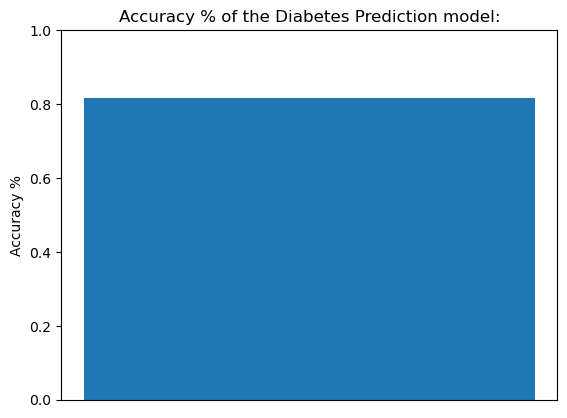

In [431]:
# Measure the accuracy of our predictions based on the actual outcome, which is held in y_test
acc = metrics.accuracy_score(y_test, predictions)

# Render precentage accuracy in a bar chart:
plt.bar(1, acc)
plt.ylim(top = 1)
plt.title("Accuracy % of the Diabetes Prediction model:")
plt.xlabel("")
plt.xticks([])
plt.ylabel("Accuracy %")
plt.show()

In [432]:
# Print exact accuaracy percentage:
acc

0.8145695364238411

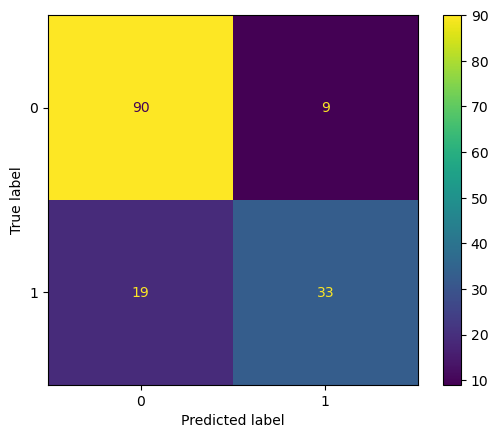

In [433]:
# Use a confusion matrix to further understand accuracy. 1 represents an outcome of the patient having diabetes and 0 represents
# that the patient does not have diabetes.
cm = metrics.confusion_matrix(y_test, predictions);

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()